In [7]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 15 # 폰트 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시 마이너스 글자가 깨지는 것방지
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
plt.rc('font', family='NanumBarunGothic')

In [9]:
# Excel 파일 경로
file_path = 'datalab (1).xlsx'

# Excel 파일 열기 (openpyxl 엔진 사용)
df = pd.read_excel(file_path, engine='openpyxl')

# 데이터프레임 출력
print(df)

            날짜      넷플릭스       영화관
0   2016-01-01  42.16106  51.40832
1   2016-02-01   3.77997  52.21984
2   2016-03-01   3.05921  32.95458
3   2016-04-01   2.82081  31.48413
4   2016-05-01   2.18849  45.31272
..         ...       ...       ...
92  2023-09-01  35.04870  24.63900
93  2023-10-01  33.79428  22.59522
94  2023-11-01  48.32308  29.82534
95  2023-12-01  46.78305  44.56617
96  2024-01-01  40.49809  26.15865

[97 rows x 3 columns]


In [10]:
x = np.array(df['넷플릭스'])
x = x[:, np.newaxis]
x_scaler = StandardScaler()
x_scaled_data = x_scaler.fit_transform(x)

y = np.array(df['영화관'])
y = y[:, np.newaxis]
y_scaler = StandardScaler()
y_scaled_data = y_scaler.fit_transform(y)

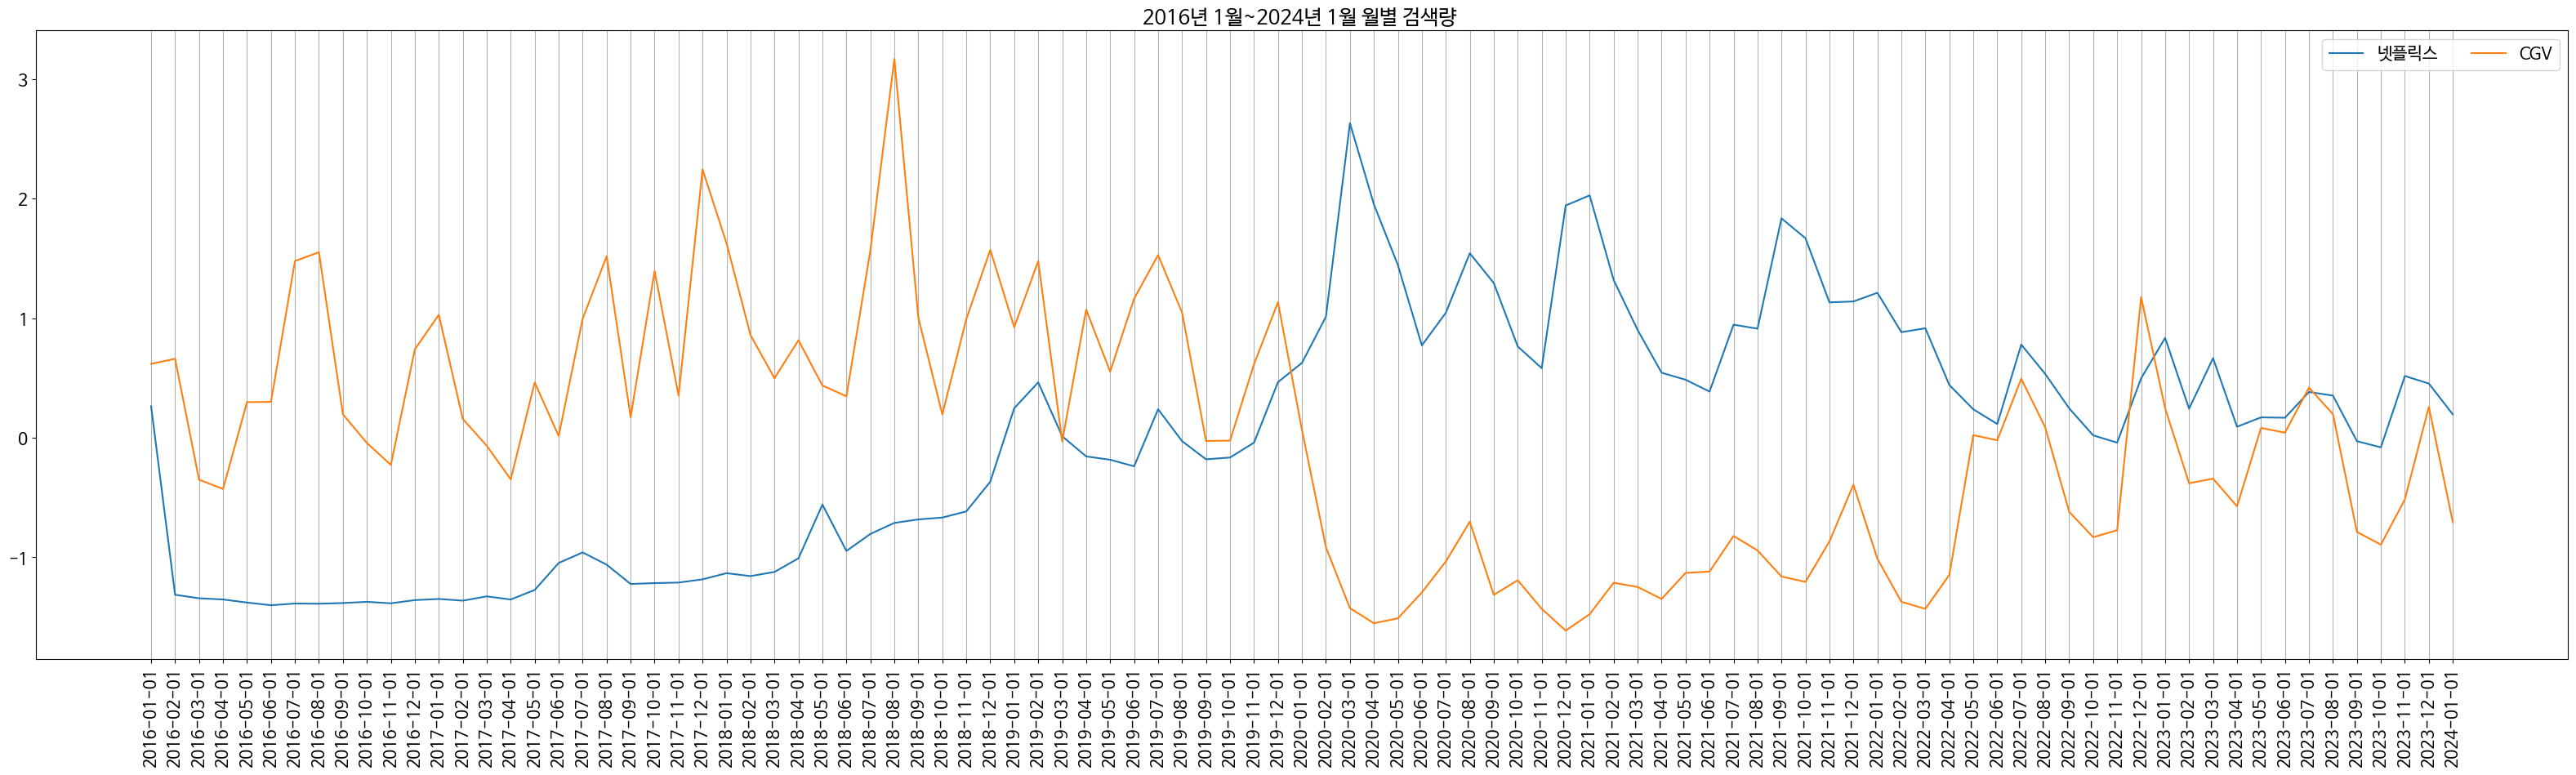

In [22]:
plt.figure(figsize=(40,10))
plt.title("2016년 1월~2024년 1월 월별 검색량 ")
plt.plot(df['날짜'], x_scaled_data, label="넷플릭스")
plt.plot(df['날짜'], y_scaled_data, label="CGV")
plt.xticks(df['날짜'], rotation=90)
plt.legend(ncol=2)
plt.grid(axis = 'x')
#plt.savefig('네이버 검색량.png', dpi=400)
plt.show()

In [23]:
regr = linear_model.LinearRegression()
regr.fit(x_scaled_data, y_scaled_data)
coef = regr.coef_
intercept = regr.intercept_
score = regr.score(x_scaled_data, y_scaled_data)
print(coef, intercept)
ds = pd.DataFrame({'a': x_scaled_data.flatten(), 'b': y_scaled_data.flatten()})
corr_matrix = ds.corr()
corr_coeff = corr_matrix.loc['a', 'b']
print('상관계수:', corr_coeff)

[[-0.63461422]] [1.77912733e-16]
상관계수: -0.6346142215390614
